# Importing Libraries

In [6]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data set

In [7]:
# Load the data set
data = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp Resources /Week 03/Day 01/ads.csv')

In [8]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [33]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Explortary Dat Analysis

In [34]:
a = data.describe()

In [35]:
type(a)

pandas.core.frame.DataFrame

In [36]:
a

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
b = a.get("TV")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


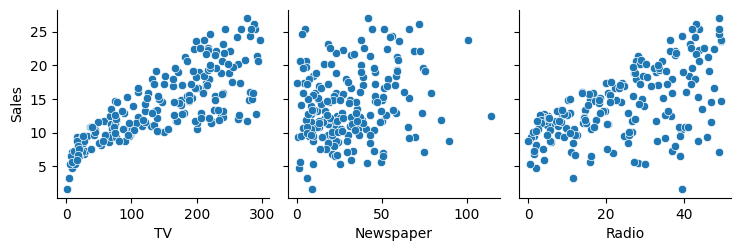

In [39]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

In [40]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


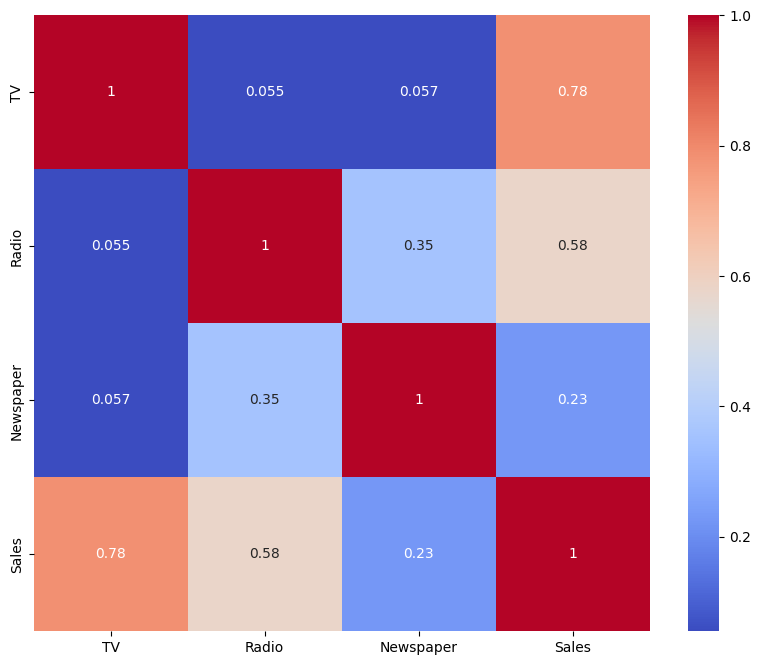

In [41]:
# correlation between different columns
plt.figure(figsize= (10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
#plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Preparation for multiple-linear regression

In [63]:
X = data[['TV', 'Newspaper']].values.reshape(-1,2)
Y = data['Sales']

In [64]:
X.shape

(200, 2)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

# Prepare model data points for visualization

In [66]:
x = X[:,0]
y = X[:,1]
z = Y

x_pred = np.linspace(data['TV'].min(), data['TV'].max(), 30) #range of tv values
y_pred = np.linspace(data['Newspaper'].min(), data['Newspaper'].max(),30) # range of radio vlaues
xx_pred, yy_pred = np.meshgrid(x_pred,y_pred)
model_viz = np.array([xx_pred .flatten(),yy_pred.flatten()]).T


# Training

In [67]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [68]:
predicted = model.predict(model_viz)
predicted.shape

(900,)

# Prediction

In [69]:
# make predication on test set
y_pred = model.predict([[20,30]])

In [70]:
print(y_pred)

[8.03955497]


In [71]:
y_pred = model.predict(X_test)
y_pred

array([ 8.3782803 , 17.18118007, 14.14566366, 18.59428826, 18.13686201,
       16.33197583, 13.4356142 , 15.30352244, 17.67545985, 17.14589948,
       11.51055513, 19.81985784,  9.72411309, 15.00308047, 11.01001691,
       10.55121965, 13.06137623, 15.31405831, 13.77052018, 12.77696479,
       16.02151629, 13.22803302, 17.2786527 , 15.78775455, 15.41980975,
       16.24878755, 18.07813081, 10.74374066, 14.52215544, 12.09680826,
       10.5572025 ,  9.05092921, 13.60348081, 15.74315393,  8.93364607,
       12.05446007, 11.66032869, 14.23912102, 16.7850524 , 17.74147866,
       18.42450828, 14.12161787, 15.58619836, 17.23447543, 11.9254192 ,
       11.5606203 , 10.52079501, 18.4565948 , 10.89032618,  8.17680239,
       16.66977759, 15.4761982 , 11.62759279, 13.20163847, 16.06827438,
        9.85634802,  7.97898265,  7.38685969, 15.67054366, 11.97439961])

# Evaluation

In [72]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [73]:
print("MES :",mse)
print("R^2 Score: ",r2)

MES : 8.042176204072392
R^2 Score:  0.5909223243258968


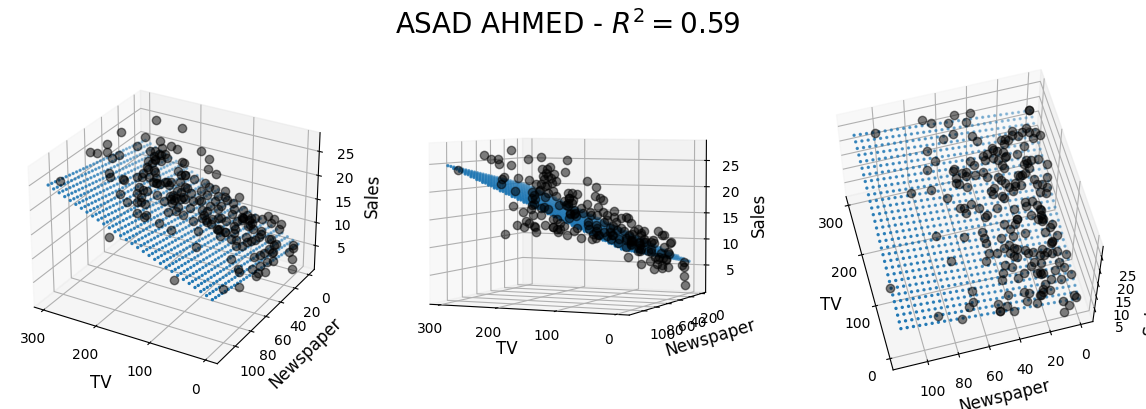

In [78]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
  ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
  ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=2)
  ax.set_xlabel('TV', fontsize=12)
  ax.set_ylabel('Newspaper', fontsize=12)
  ax.set_zlabel('Sales', fontsize=12)
  ax.locator_params(nbins=4, axis='x')
  ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('ASAD AHMED - $R^2 = %.2f$' % r2, fontsize=20)
fig.tight_layout()
plt.show()